### IMPORTS

In [100]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import os

# Graphs
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from matplotlib.colors import LinearSegmentedColormap

In [53]:
# Construct the path to the CSV file relative to the current notebook
current_file_path = os.path.abspath("main.ipynb")
current_dir = os.path.dirname(current_file_path)
data_src_path = os.path.join(current_dir, 'data', 'data.csv')

# Define column names corresponding to survey questions
column_names = [
    "timestamp",  # Horodateur
    "gender",  # 1) Quel est votre genre ?
    "age_range",  # 2) Dans quelle tranche d’âge vous situez-vous ?
    "industry_sector",  # 3) Dans quel secteur d’activité êtes-vous ?
    "company_department",  # 4) Dans quel service de votre entreprise exercez-vous ?
    "familiar_with_ai",  # 5) Êtes-vous familier avec l'IA ?
    "resistant_to_ai",  # 6) Êtes-vous réfractaire à l’utilisation de l'IA au travail ?
    "openness_to_ai_after_text",  # 7) Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?
    "current_ai_usage",  # 8) Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l'IA ?
    "tools_used",  # 9) Utilisez-vous les outils suivants ?
    "motivations_for_using_ai",  # 10) Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l'IA ?
    "issues_with_ai",  # 11) Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?
    "issues_details",  # Si oui, lesquels ?
    "trust_in_ai_decisions",  # 12) Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l'IA ?
    "concerns_about_ai_impact",  # 13) Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?
    "loss_of_autonomy_due_to_ai",  # 14) Dans quelle mesure pensez-vous que l'IA pourrait vous faire perdre votre autonomie ?
    "reduced_thinking_due_to_ai",  # 15) Dans quelle mesure pensez-vous que l'IA pourrait réduire vos capacités de réflexions ?
    "fear_of_job_loss_due_to_ai",  # 16) Craignez-vous que l'IA ne vous fasse perdre votre emploi ?
    "details_fear_of_job_loss",  # Pourquoi ?
    "other_concerns",  # 17) Avez-vous d’autres inquiétudes vis-à-vis de votre travail face à l’arrivée de l’IA ?
    "details_other_concerns",  # Si oui, lesquelles ?
    "involved_in_ai_development",  # 18) Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?
    "want_to_be_consulted_on_ai_development",  # 19) Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?
    "impact_of_being_consulted_on_ai_use",  # 20) Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?
    "willingness_for_ai_training",  # 21) Seriez-vous disposé à suivre une formation pour mieux comprendre et utiliser les technologies basées sur l'IA ?
    "comments_and_suggestions_about_ai"  # 22) Au vu des questions précédentes, avez-vous des commentaires ou des suggestions au sujet de l’arrivée d’outils utilisant l’IA dans votre entreprise ?
]

df_survey = pd.read_csv(
  data_src_path,
  delimiter=',',
  header=0,
  index_col=False ,
  names=column_names,
)

# Display the first 5 rows of the dataframe
df_survey.head()

,timestamp,gender,age_range,industry_sector,company_department,familiar_with_ai,resistant_to_ai,openness_to_ai_after_text,current_ai_usage,tools_used,...,reduced_thinking_due_to_ai,fear_of_job_loss_due_to_ai,details_fear_of_job_loss,other_concerns,details_other_concerns,involved_in_ai_development,want_to_be_consulted_on_ai_development,impact_of_being_consulted_on_ai_use,willingness_for_ai_training,comments_and_suggestions_about_ai
0,06/05/2024 14:13:42,Autre,18-25 ans,Technologies de l'information et de la communi...,R&D,Un peu familier,Non,Très ouvert,Jamais,Reconnaissance faciale/biométrique (ex: déverr...,...,Considérablement,Non,"L'IA est encore trop bête pour ça, et je pense...",Oui,Les services externes d'IA sont une très gross...,Non,Non,Non,Peut-être,NaN
1,06/05/2024 14:24:14,Homme,25-35 ans,Immobilier,Finance/Comptabilité,Un peu familier,Non,Très ouvert,Jamais,Autres (à spécifier),...,Un peu,Non,Métier de contrôle indispensable,Non,NaN,Non,Non,Oui,"Oui, certainement",NaN
2,06/05/2024 14:46:05,Homme,18-25 ans,Transport et logistique,Supply Chain,"Oui, très familier",Non,Très ouvert,Parfois,Reconnaissance faciale/biométrique (ex: déverr...,...,Considérablement,Non,L'utilisation de l'IA requiert un utilisateur ...,Non,NaN,Oui,Oui,Oui,"Oui, certainement",NaN
3,06/05/2024 14:46:37,Femme,25-35 ans,Immobilier,Investissement,Un peu familier,Non,Plutôt ouvert,Jamais,Reconnaissance faciale/biométrique (ex: déverr...,...,Partiellement,Non,L'IA doit être une aide mais la décision et le...,Oui,Ne pas savoir suffisamment bien l'utiliser au ...,Non,Oui,Oui,"Oui, certainement",NaN
4,06/05/2024 15:07:09,Homme,25-35 ans,Immobilier,Finance/Comptabilité,"Oui, très familier",Non,Plutôt ouvert,Parfois,Traitement automatique du langage : chatbots (...,...,Un peu,Non,Les taches à plus forte valeur ajoutée restero...,Non,NaN,Non,Oui,Oui,"Oui, certainement",NaN


In [54]:
# if % is less than 1% then it will be combined into 'Others'
def plot_pie(column, title, xlabel, ylabel):
  grah_df = df_survey[column].value_counts(normalize=True)
  others_sum = grah_df[grah_df <= 0.01].sum()
  grah_df = grah_df[grah_df > 0.01]
  if others_sum > 0:
    grah_df['Others'] = others_sum
  plt.figure(figsize=(12, 8))
  grah_df.plot(kind='pie', autopct='%1.1f%%')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()


# 📄 Survey responses

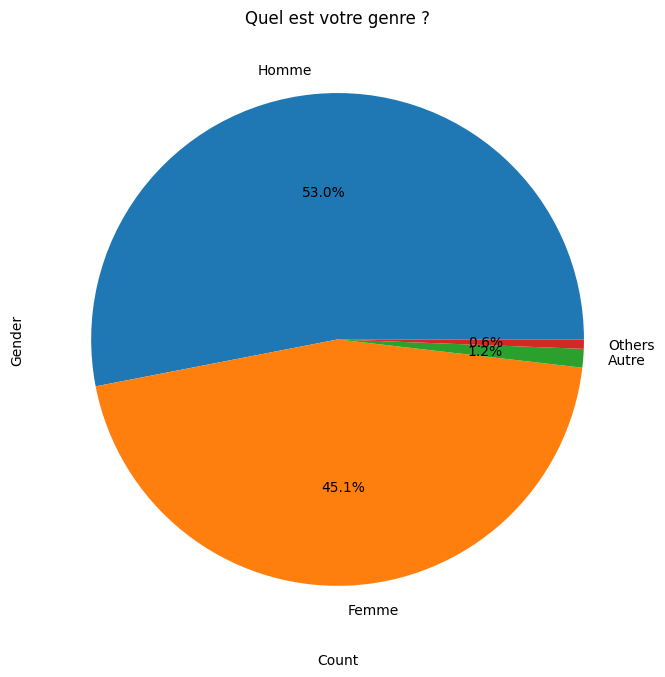

In [55]:
plot_pie('gender', 'Quel est votre genre ?', 'Count', 'Gender')

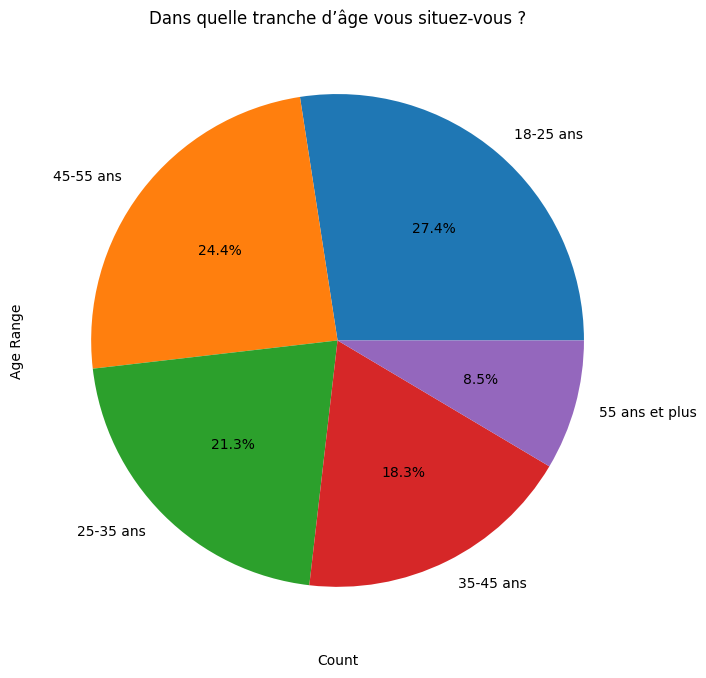

In [56]:
plot_pie('age_range', 'Dans quelle tranche d’âge vous situez-vous ?', 'Count', 'Age Range')

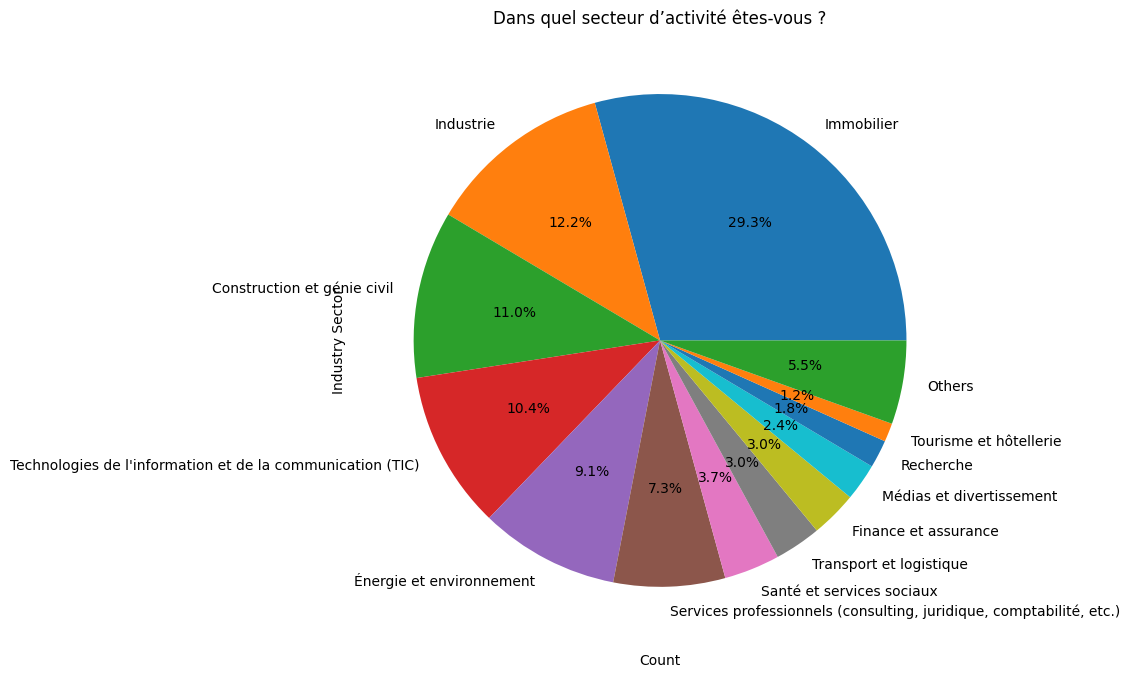

In [57]:
plot_pie('industry_sector', 'Dans quel secteur d’activité êtes-vous ?', 'Count', 'Industry Sector')

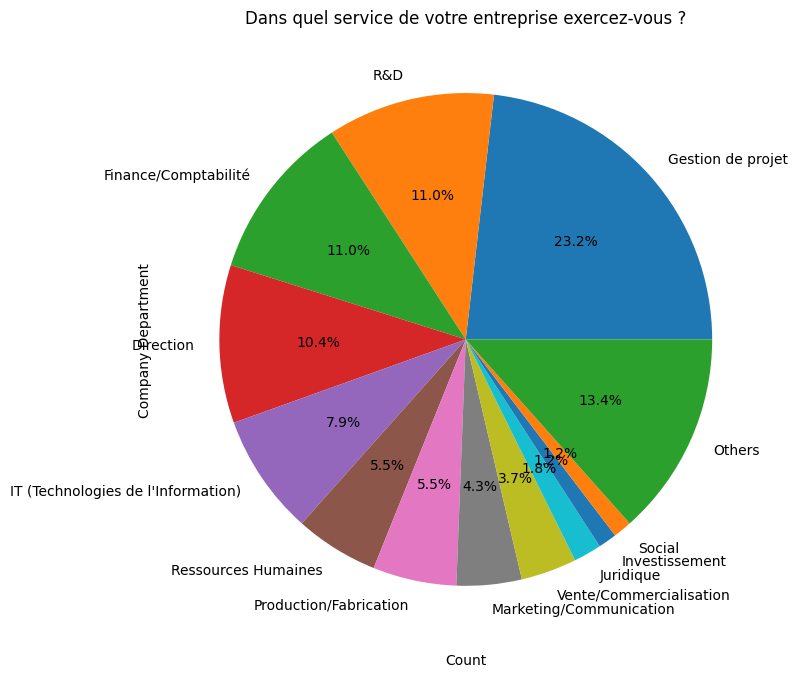

In [58]:
plot_pie('company_department', 'Dans quel service de votre entreprise exercez-vous ?', 'Count', 'Company Department')

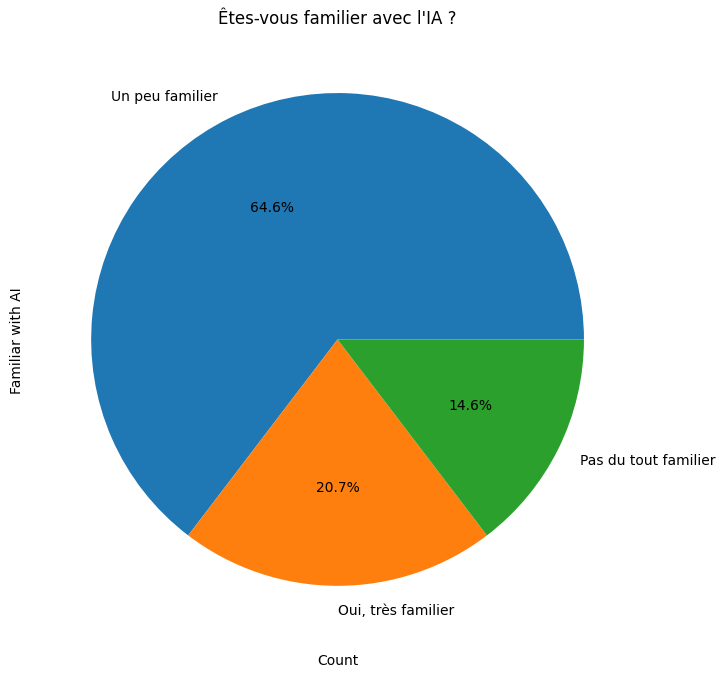

In [59]:
plot_pie('familiar_with_ai', 'Êtes-vous familier avec l\'IA ?', 'Count', 'Familiar with AI')

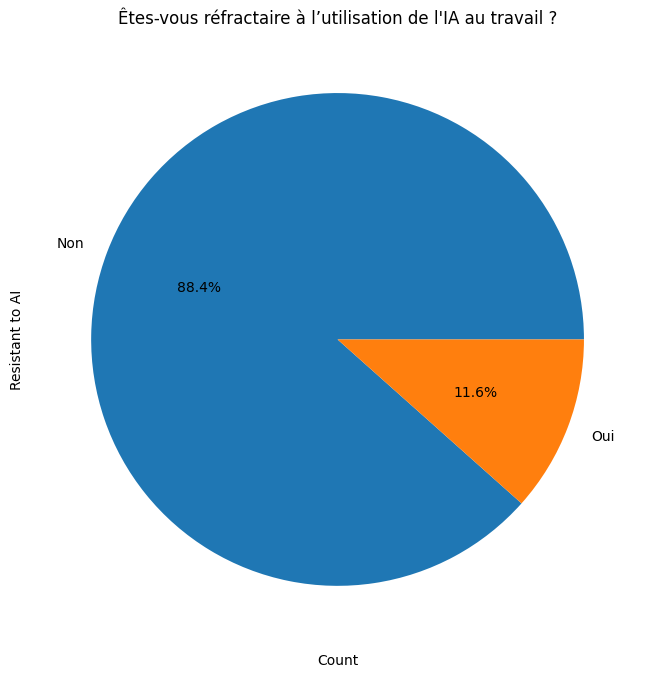

In [60]:
plot_pie('resistant_to_ai', 'Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?', 'Count', 'Resistant to AI')

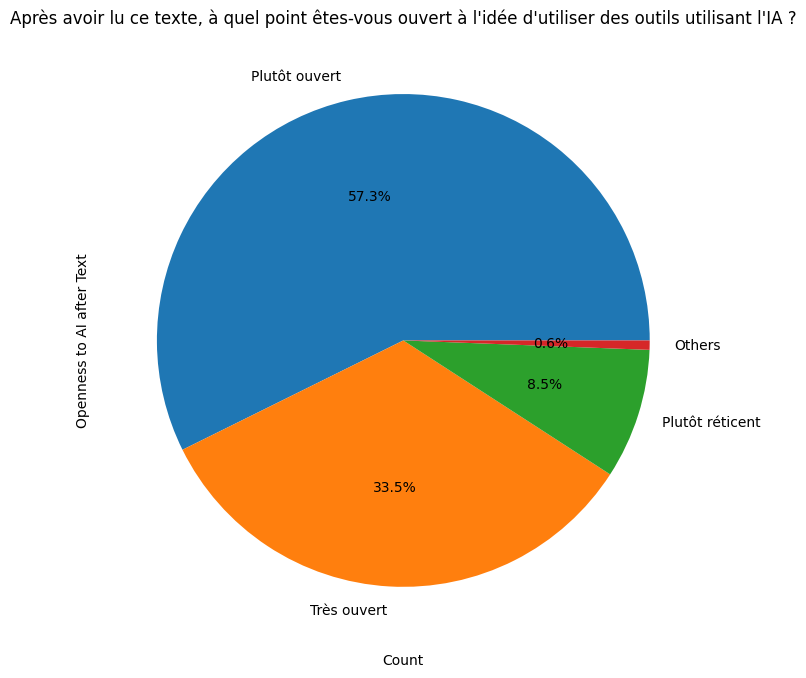

In [61]:
plot_pie('openness_to_ai_after_text', 'Après avoir lu ce texte, à quel point êtes-vous ouvert à l\'idée d\'utiliser des outils utilisant l\'IA ?', 'Count', 'Openness to AI after Text')

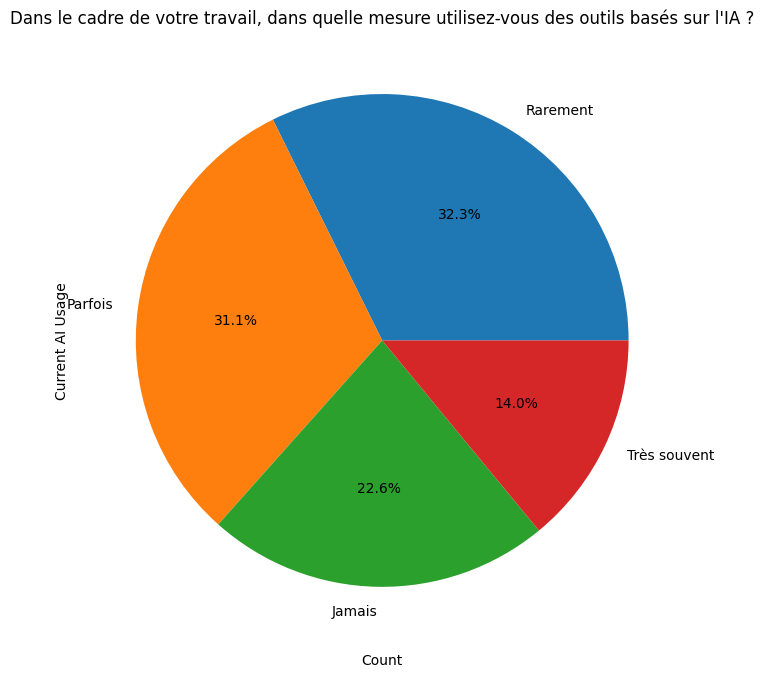

In [62]:
plot_pie('current_ai_usage', 'Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l\'IA ?', 'Count', 'Current AI Usage')

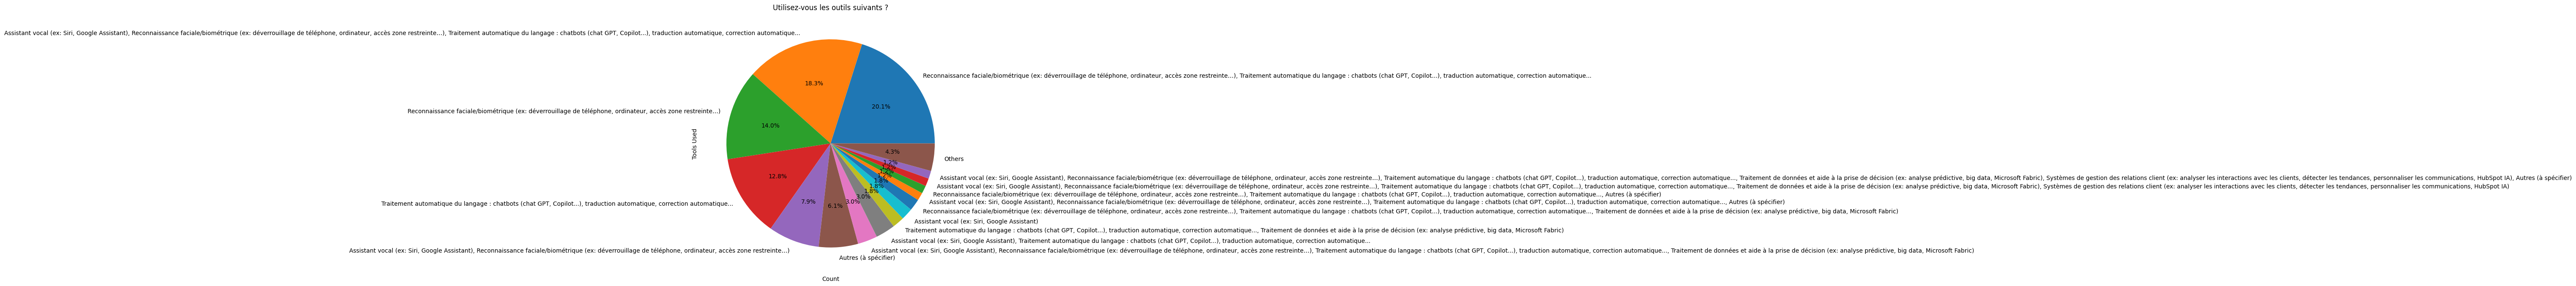

In [63]:
plot_pie('tools_used', 'Utilisez-vous les outils suivants ?', 'Count', 'Tools Used')

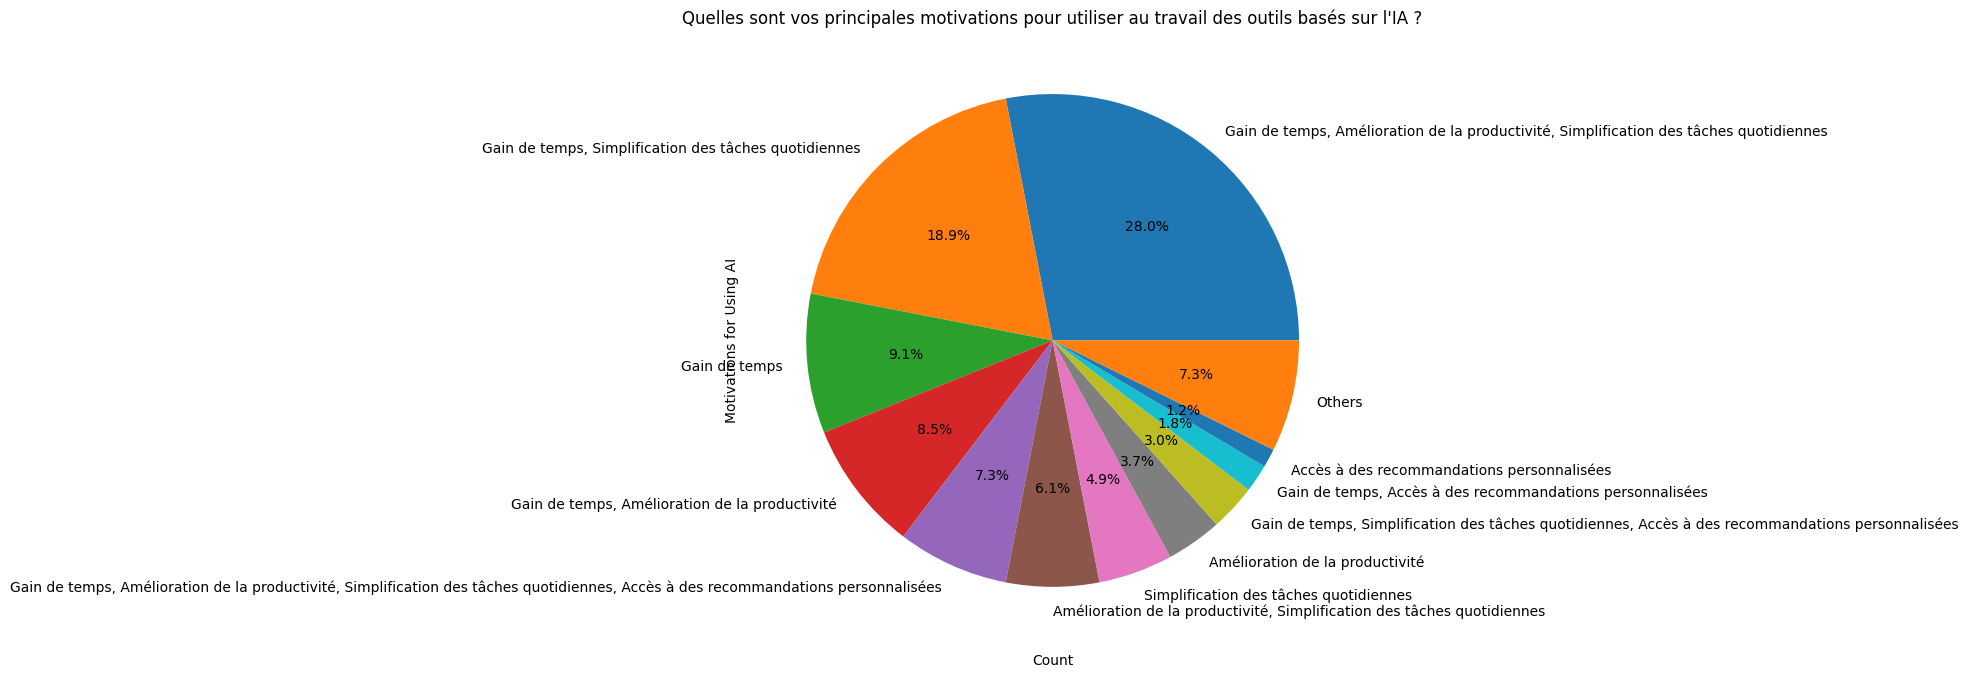

In [64]:
plot_pie('motivations_for_using_ai', 'Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l\'IA ?', 'Count', 'Motivations for Using AI')

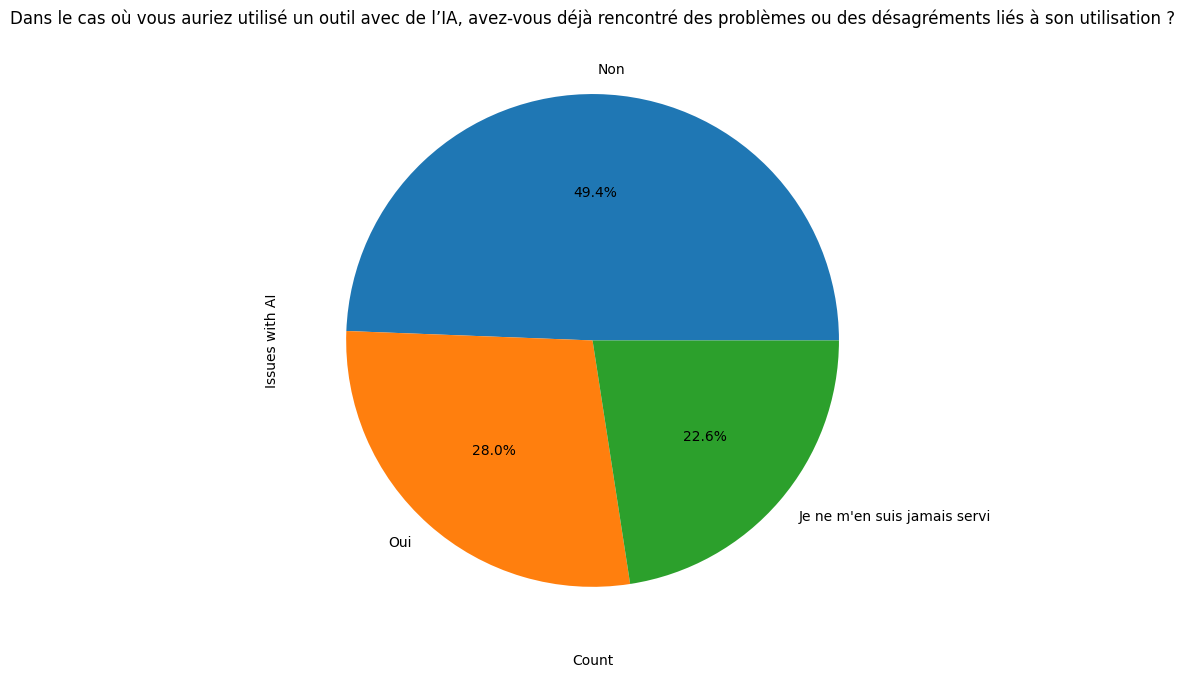

In [65]:
plot_pie('issues_with_ai', 'Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?', 'Count', 'Issues with AI')

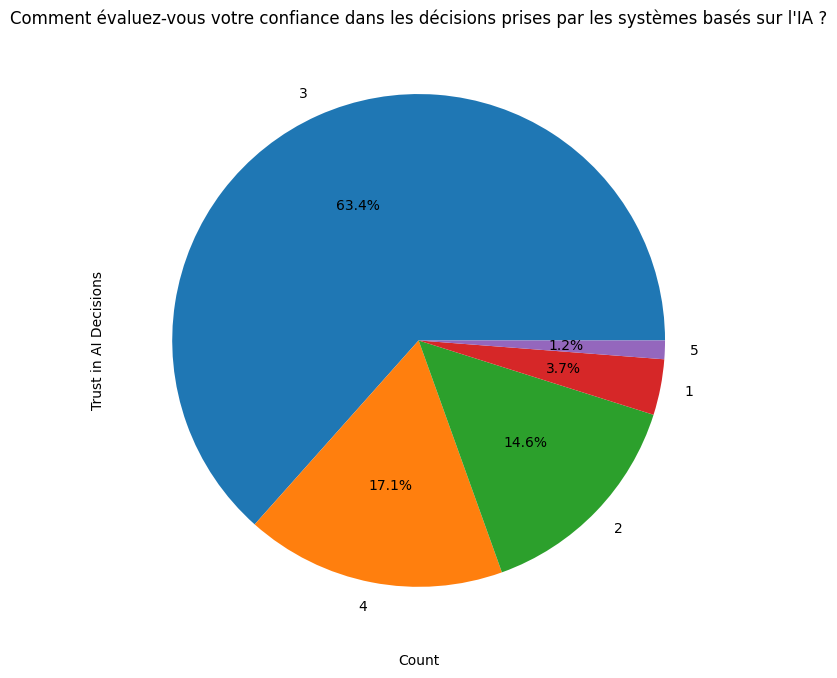

In [66]:
plot_pie('trust_in_ai_decisions', 'Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l\'IA ?', 'Count', 'Trust in AI Decisions')

# 🔬 Demographics of our survey sample

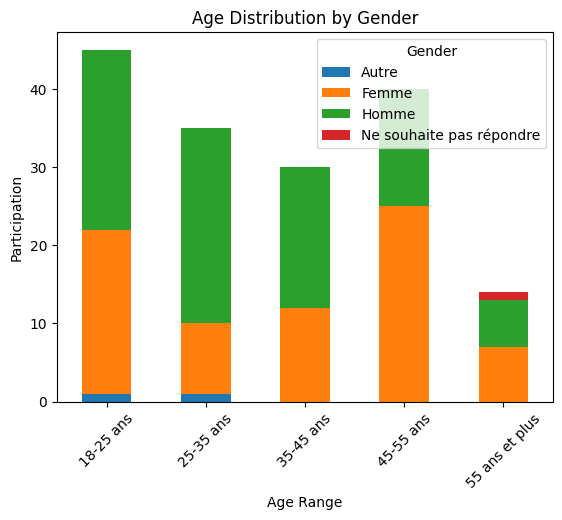

In [67]:
# 1. Age Distribution by Gender (Stacked Bar Plot)
age_gender = df_survey.groupby(['age_range', 'gender']).size().unstack()
age_gender.plot(kind='bar', stacked=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age Range')
plt.ylabel('Participation')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

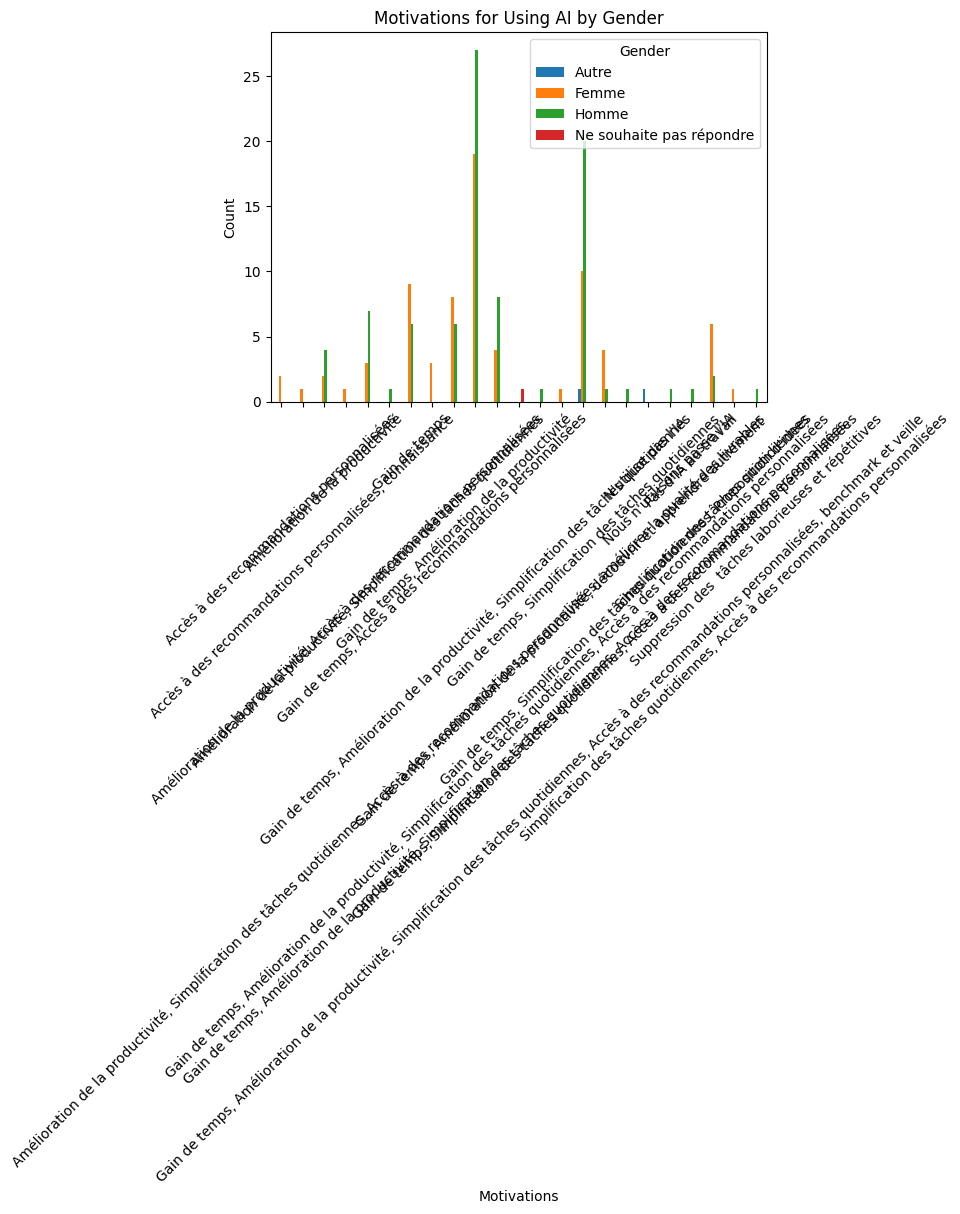

In [68]:
# 3. Motivations for Using AI by Gender (Grouped Bar Plot)
motivations_gender = df_survey.groupby(['motivations_for_using_ai', 'gender']).size().unstack(1)
motivations_gender.plot(kind='bar')
plt.title('Motivations for Using AI by Gender')
plt.xlabel('Motivations')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

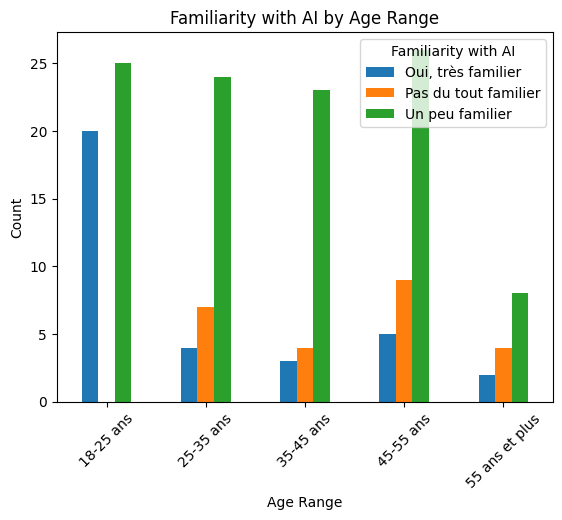

In [69]:
# 2. Familiarity with AI by Age Range (Grouped Bar Plot)
familiarity_age = df_survey.groupby(['age_range', 'familiar_with_ai']).size().unstack()
familiarity_age.plot(kind='bar')
plt.title('Familiarity with AI by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')
plt.show()


https://zhauniarovich.com/post/2022/2022-09-matplotlib-graphs-in-research-papers/

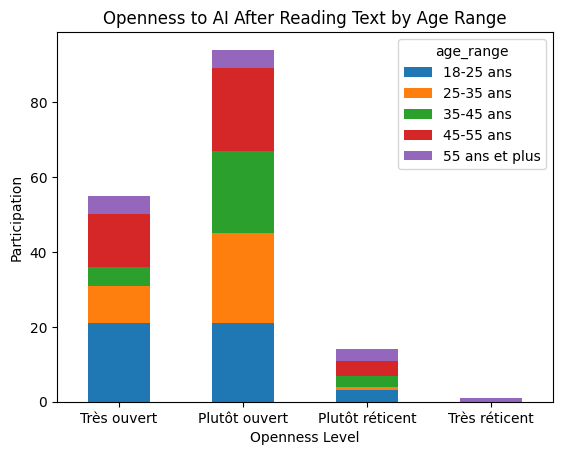

In [112]:
openness_age = df_survey.groupby([
  'age_range',
  'openness_to_ai_after_text'
]).size().unstack(0).reindex([
  'Très ouvert',
  'Plutôt ouvert',
  'Plutôt réticent',
  'Très réticent'
])
openness_age.plot(kind='bar', stacked=True)
plt.title('Openness to AI After Reading Text by Age Range')
plt.xlabel('Openness Level')
plt.ylabel('Participation')
plt.xticks(rotation=0)
plt.show()

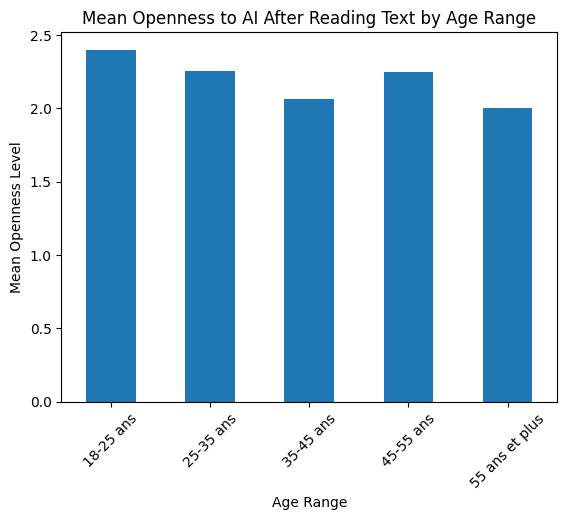

In [71]:
df_openness = df_survey[['age_range', 'openness_to_ai_after_text']].copy()
df_openness['openness_to_ai_after_text'] = df_openness['openness_to_ai_after_text'].map({
    'Très ouvert': 3,
    'Plutôt ouvert': 2,
    'Plutôt réticent': 1,
    'Très réticent': 0
})
openness_age_mean = df_openness.groupby('age_range', observed=False)['openness_to_ai_after_text'].mean()
openness_age_mean.plot(kind='bar')
plt.title('Mean Openness to AI After Reading Text by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Mean Openness Level')
plt.xticks(rotation=45)
plt.show()

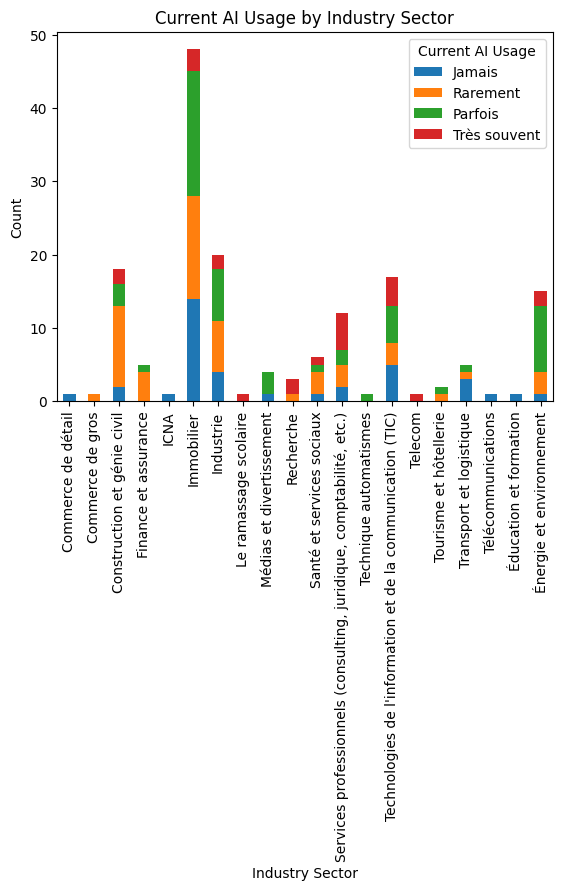

In [95]:
# 2. Current AI Usage by Industry Sector
current_usage_sector = df_survey.groupby('industry_sector')['current_ai_usage'].value_counts().unstack().reindex(columns=[
  'Jamais',
  'Rarement',
  'Parfois',
  'Très souvent'
])
current_usage_sector.drop('Le même que toi', inplace=True, axis=0)
current_usage_sector.plot(kind='bar', stacked=True)
plt.title('Current AI Usage by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.legend(title='Current AI Usage')
plt.show()

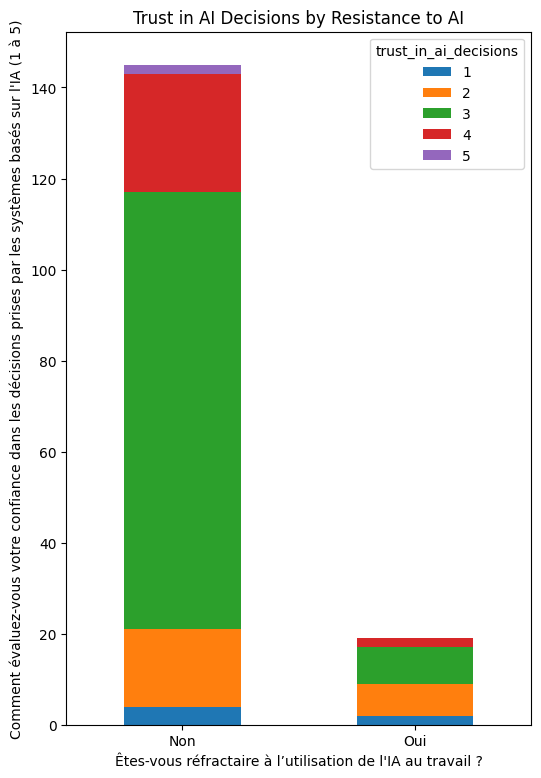

In [99]:
# 3. Trust in AI Decisions by Resistance to AI
trust_resistance = df_survey.groupby('resistant_to_ai')['trust_in_ai_decisions'].value_counts().unstack()
trust_resistance.plot(kind='bar', figsize=(6, 9), stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l\'IA (1 à 5)')
plt.xticks(rotation=0)
plt.show()

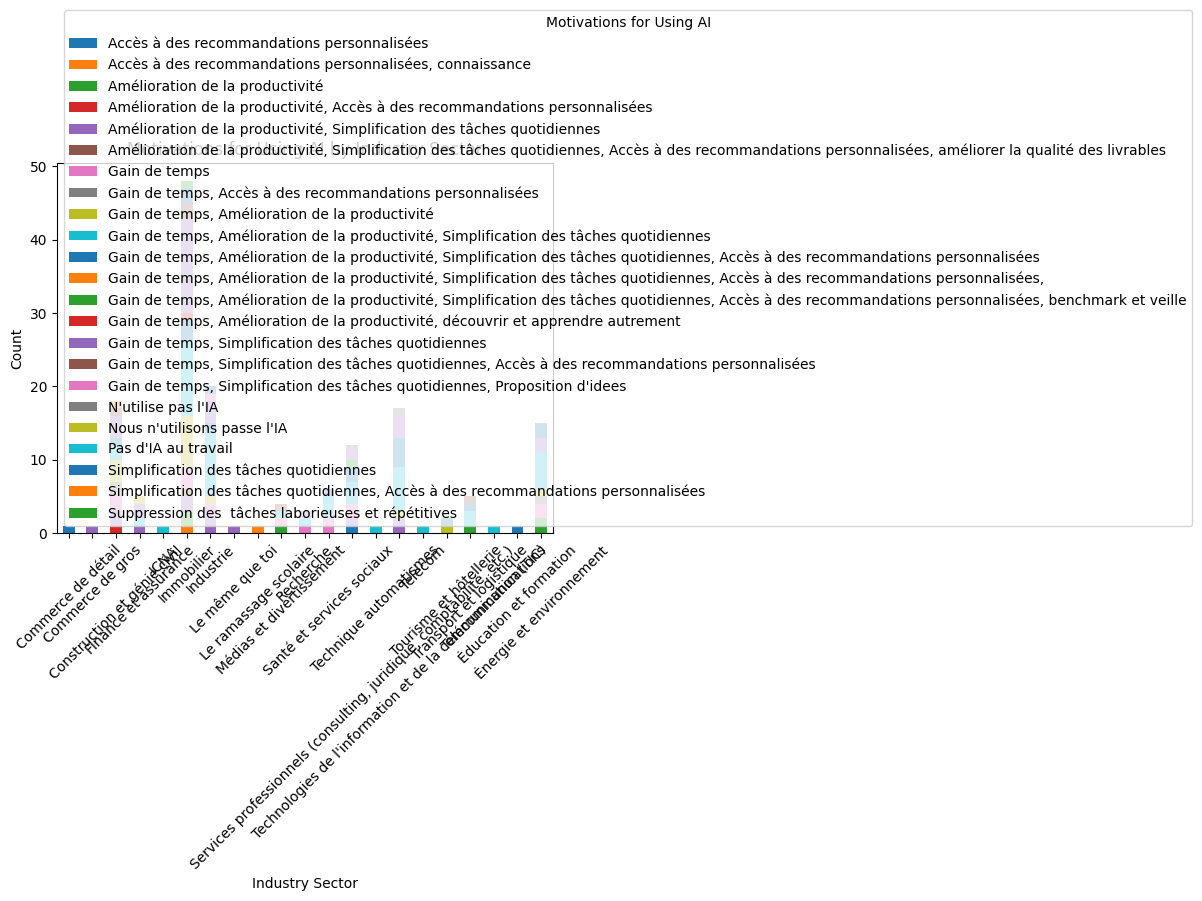

In [74]:
# 4. Motivations for Using AI by Industry Sector
motivations_sector = df_survey.groupby('industry_sector')['motivations_for_using_ai'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Motivations for Using AI by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Motivations for Using AI')
plt.show()

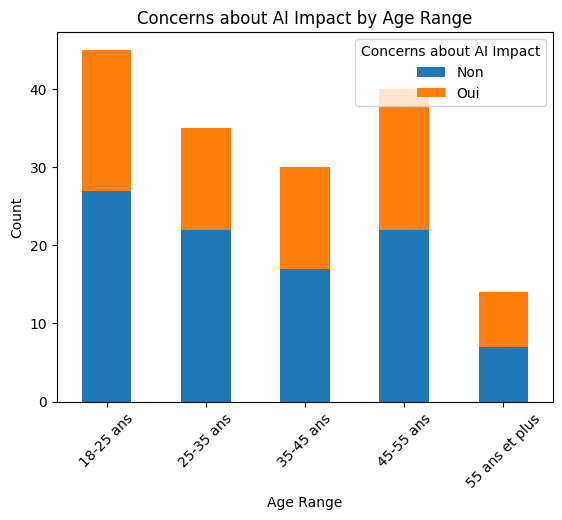

In [75]:
# 5. Concerns about AI Impact by Age Range
concerns_age = df_survey.groupby('age_range')['concerns_about_ai_impact'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Concerns about AI Impact by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Concerns about AI Impact')
plt.show()

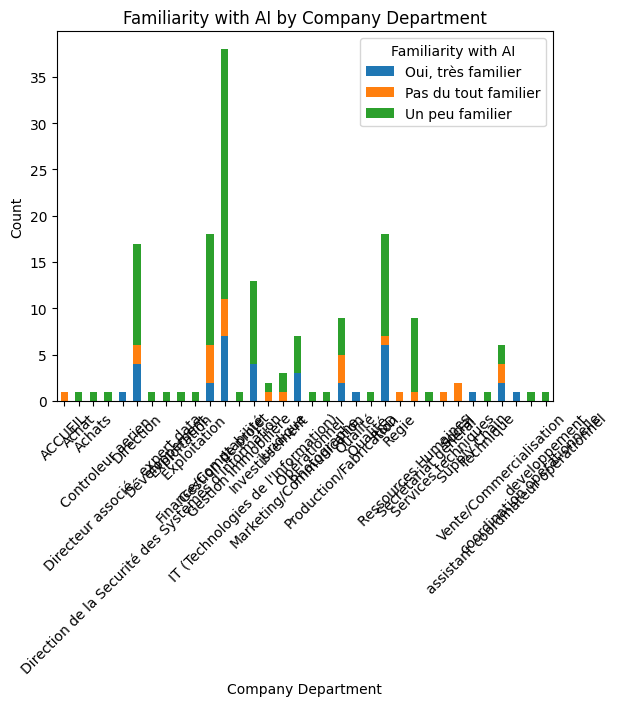

In [76]:
# 6. Familiarity with AI by Company Department
familiarity_department = df_survey.groupby('company_department')['familiar_with_ai'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Familiarity with AI by Company Department')
plt.xlabel('Company Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')
plt.show()

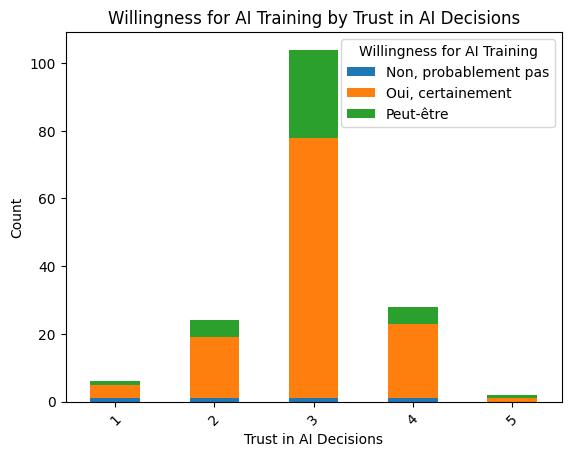

In [77]:
# 7. Willingness for AI Training by Trust in AI Decisions
training_trust = df_survey.groupby('trust_in_ai_decisions')['willingness_for_ai_training'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Willingness for AI Training by Trust in AI Decisions')
plt.xlabel('Trust in AI Decisions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Willingness for AI Training')
plt.show()

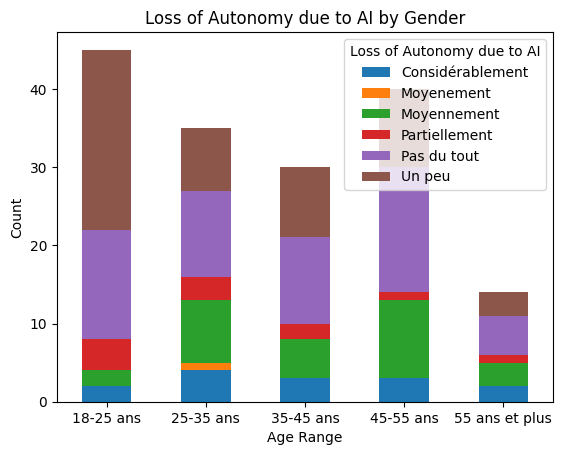

In [116]:
# 8. Loss of Autonomy due to AI by Gender
loss_autonomy_gender = df_survey.groupby('age_range')['loss_of_autonomy_due_to_ai'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Loss of Autonomy due to AI by Gender')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loss of Autonomy due to AI')
plt.show()

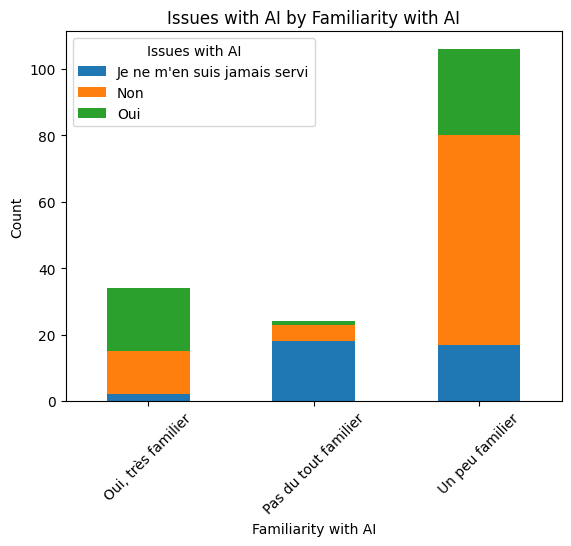

In [79]:
# 9. Issues with AI by Familiarity with AI
issues_familiarity = df_survey.groupby('familiar_with_ai')['issues_with_ai'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Issues with AI by Familiarity with AI')
plt.xlabel('Familiarity with AI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Issues with AI')
plt.show()

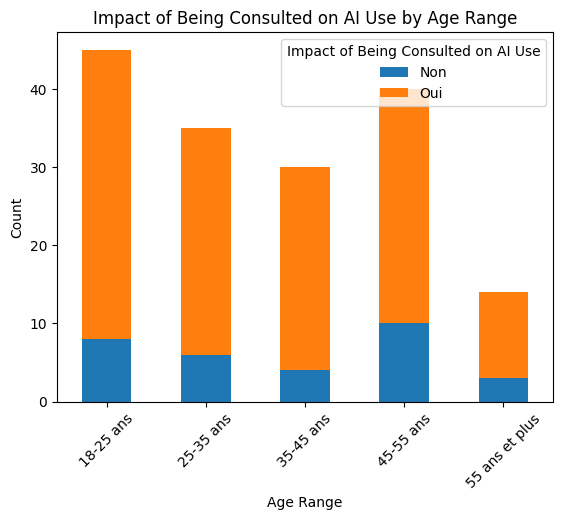

In [80]:
# 10. Impact of Being Consulted on AI Use by Age Range
impact_consulted_age = df_survey.groupby('age_range')['impact_of_being_consulted_on_ai_use'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Impact of Being Consulted on AI Use by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Impact of Being Consulted on AI Use')
plt.show()